# Final Project Econ 323

In this project, I will be investigating how long term water boil advisories affect migration, education, and unemployment levels within indigenous nations in Canada. Using data from Statistics Canada and Indigenous Services Canada, I will be looking at long term water boil advisories for the period of 1996-2016. This project is based upon my existing thesis in Econ 494. 

### Initial Cleaning of Data
I take a data set in which I have merged individual census data for each affected Indigenous nation (which was previously merged within Python) and clean it further.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm


import qeds
qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn import linear_model

In [32]:
#importing Demographic Data on Individual Indigneous Nations from 1996-2016

Demo_data = pd.read_excel(r'master_data_2016_copy.xlsx')
demo_df = pd.DataFrame(Demo_data)
demo_df.head()

#dropping columns
demo_df.drop(["  Married spouses and common-law partners", "  Lone parents"], axis = 1, inplace = True)
demo_df.drop(["Number of Years Advisory was On "], axis=1, inplace = True)

#cleaning column names 
demo_df.rename(columns={"Year":"year", "First Nation":"first_nation", "Population": "population"}, inplace = True)
demo_df.rename(columns={"Total - Marital Status 15 years and over":"total_married"}, inplace = True)
demo_df.rename(columns={"% of the Aboriginal identity population with an Aboriginal language as mother tongue":"aboriginal_mother_tongue"}, inplace = True)
demo_df.rename(columns={"% of the Aboriginal identity population who speak an Aboriginal language most often at home":"aboriginal_home_language"}, inplace = True)
demo_df.rename(columns={"  Children in census families":"children"}, inplace = True)
demo_df.rename(columns={"  Married or living common law":"married_commonlaw","  Not married and not living common law":"notmarried_commonlaw"}, inplace = True)
demo_df.rename(columns={"Total - Family Characteristics":"total_family","  Persons not in census families":"not_in_family"}, inplace = True)
demo_df.rename(columns={"Total - Mobility status 1 year ago ":"total_mobility_1yr", "Total - Mobility status 5 years ago":"total_mobility_5yr"}, inplace = True)
demo_df.rename(columns={"  Non-movers":"non-movers_1yr","  Movers":"movers_1yr","  Non-movers.1":"non-movers_5yr","  Movers.1":"movers_5yr"}, inplace = True)
demo_df.rename(columns={"Total - Highest certificate, diploma or degree ":"total_hs_higher_edu","  No certificate, diploma or degree":"no_hs_higheredu","  Secondary (high) school diploma or equivalency certificate":"hs_edu"}, inplace = True)
demo_df.rename(columns={"   Persons with a trades; college or university certificate or diploma (below bachelor's degree)":"higher_edu_below"}, inplace = True)
demo_df.rename(columns={"  University certificate, diploma or degree at bachelor level or above":"higher_edu_bach"}, inplace = True)
demo_df.rename(columns={"Total - Labour force status ": "total_lbr","  In the labour force":"in_lbr_force","    Employed":"employed","    Unemployed":"unemployed","  Not in the labour force":"not_in_lbr_force"},inplace = True)
demo_df.rename(columns={"Participation rate":"participation_rate", "Employment rate":"employment_rate","Unemployment rate":"unemployment_rate","Multiple On":"multiple_on","Advisory On":"advisory_on"}, inplace = True)

#converting all relevant columns into percentages represented in decimal format
demo_df["employment_rate"] = demo_df["employment_rate"].div(100)
demo_df["unemployment_rate"] = demo_df["unemployment_rate"].div(100)
demo_df["participation_rate"] = demo_df["participation_rate"].div(100)
demo_df["married"] = demo_df["married_commonlaw"]/demo_df["total_married"]
demo_df["child_perc"] = demo_df["children"]/demo_df["total_family"]
demo_df["single_perc"] = demo_df["not_in_family"]/demo_df["total_family"]
demo_df["movers_1yr_perc"] = demo_df["movers_1yr"]/demo_df["total_mobility_1yr"]
demo_df["movers_5yr_perc"] = demo_df["movers_5yr"]/demo_df["total_mobility_5yr"]

#generating new column for hs and uni education
demo_df["high_school_more"] = demo_df["hs_edu"] + demo_df["higher_edu_bach"]+ demo_df["higher_edu_below"]
demo_df["high_school_more"] = demo_df["high_school_more"]/demo_df["total_hs_higher_edu"]


#preview of cleaned data  
demo_df.head()


,year,first_nation,population,total_married,married_commonlaw,notmarried_commonlaw,total_family,children,not_in_family,aboriginal_mother_tongue,...,employment_rate,unemployment_rate,multiple_on,advisory_on,married,child_perc,single_perc,movers_1yr_perc,movers_5yr_perc,high_school_more
0,1996,Shoal Lake No.40,164,100.0,35.0,70.0,40.0,30.0,NaN,0.666667,...,0.450,0.167,0,0,0.350000,0.750000,NaN,NaN,NaN,NaN
1,1996,North Spirit Lake,157,110.0,35.0,75.0,35.0,25.0,NaN,0.750000,...,0.478,0.231,0,0,0.318182,0.714286,NaN,NaN,NaN,NaN
2,1996,Sandy Lake,1611,950.0,450.0,500.0,355.0,290.0,NaN,0.618012,...,0.416,0.186,0,0,0.473684,0.816901,NaN,NaN,NaN,NaN
3,1996,Toosey,75,55.0,0.0,50.0,15.0,10.0,NaN,0.133333,...,0.500,0.250,0,0,0.000000,0.666667,NaN,NaN,NaN,NaN
4,1996,Indian Island,52,30.0,5.0,25.0,15.0,0.0,NaN,0.272727,...,0.333,0.500,0,0,0.166667,0.000000,NaN,NaN,NaN,NaN


### Preliminary Graphs of the Data

Here I look the outcome variables: high school and/or higher level education, unemployment rates, and migration (as measured by population change) and see how they are affected when a long term water boil advisory is turned on. These graphs are meant to give some preliminary observations on the composition of the data before regressions are run. 




Text(0.5, 1.0, 'Boxplot of HS/Higher Education')

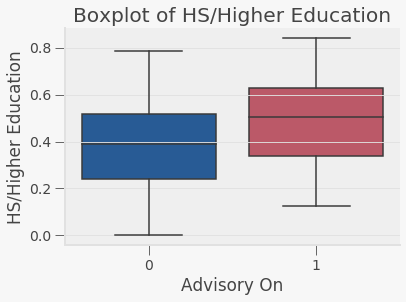

In [3]:
#boxpot of HS/Higher Education
import seaborn as sns
edu_boxplot = sns.boxplot(x="advisory_on", y="high_school_more", data=demo_df)
edu_boxplot.set_xlabel("Advisory On")
edu_boxplot.set_ylabel("HS/Higher Education")
edu_boxplot.set_title("Boxplot of HS/Higher Education")

Text(0.5, 1.0, 'Boxplot of Unemployment Rate')

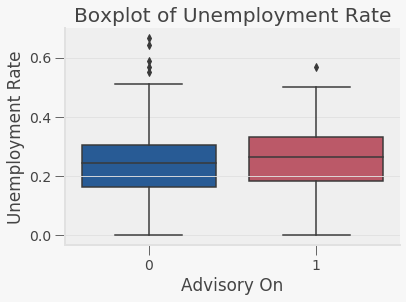

In [4]:
#boxplot of unemployment rate
unemp_boxplot = sns.boxplot(x="advisory_on", y="unemployment_rate", data=demo_df)
unemp_boxplot.set_xlabel("Advisory On")
unemp_boxplot.set_ylabel("Unemployment Rate")
unemp_boxplot.set_title("Boxplot of Unemployment Rate")


Text(0.5, 1.0, 'Box Plot of Population')

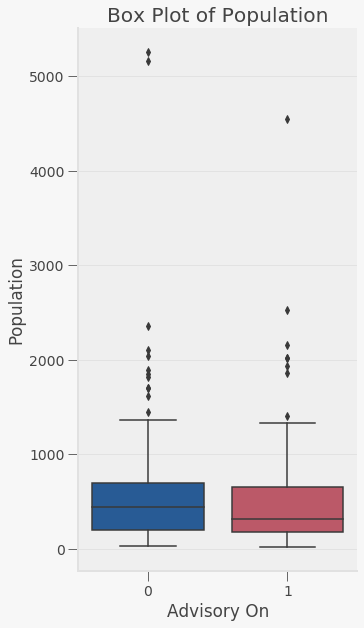

In [5]:
#boxplot of migration (population)

plt.figure(figsize=(5,10))
pop_boxplot = sns.boxplot(x="advisory_on", y="population", data=demo_df)
pop_boxplot.set_xlabel("Advisory On")
pop_boxplot.set_ylabel("Population")
pop_boxplot.set_title("Box Plot of Population")

[-1, 2, 0, 1500]

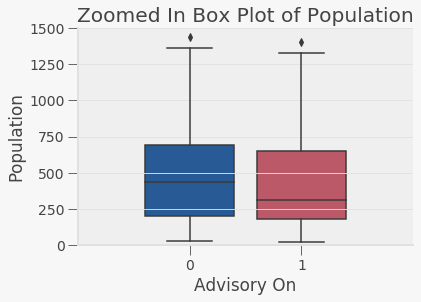

In [6]:
#zooming in 
pop_boxplot = sns.boxplot(x="advisory_on", y="population", data=demo_df)
pop_boxplot.set_xlabel("Advisory On")
pop_boxplot.set_ylabel("Population")
pop_boxplot.set_title("Zoomed In Box Plot of Population")
plt.axis([-1,2,0,1500])

From the graphs, we see that when an advisory is turned on, the mean of the unemployment rate and attainment of a highschool/higher level education is higher than when an adivsory is off or not in place. For population (migration change) we see that it is slightly lower when an advisory is in effect. What will be interesting to see is how 

### Map of Water Boil Advisories


To get a better idea of how long term water boil advisories are distributed across Canada, I'm going to make a map of the individual First Nation communities that are affected. First, I'll make my dataset of coordinates so I will be ready to put the point on the map. I created this dataset by searching up the First Nation community name in Google, and taking coordinates from the GeoHacks website from Wikipedia, or from Google Maps. 

In [7]:
#setting up the libraries for the map
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import shapefile
from shapely.geometry import Point
from shapely.geometry import Polygon

#downloading coordinates for First Nation communities
map_data = pd.read_excel(r'map data 2.0.xlsx')
map_df = pd.DataFrame(map_data)
map_df.head()
map_df["Coordinates"] = list(zip(map_df["Longitude"], map_df["Latitude"]))
map_df["Coordinates"] = map_df["Coordinates"].apply(Point)


#making the map data as a Geo Data Frame
geo_wb_map = gpd.GeoDataFrame(map_df, geometry="Coordinates")
geo_wb_map.head()


,First Nation,Latitude,Longitude,Coordinates
0,Shoal Lake No.40,49.616667,-95.150000,POINT (-95.15000 49.61667)
1,North Spirit Lake,52.483333,-93.033333,POINT (-93.03333 52.48333)
2,Sandy Lake,53.066667,-93.333333,POINT (-93.33333 53.06667)
3,Toosey,51.919444,-122.483333,POINT (-122.48333 51.91944)
4,Indian Island,46.690000,-64.790000,POINT (-64.79000 46.69000)


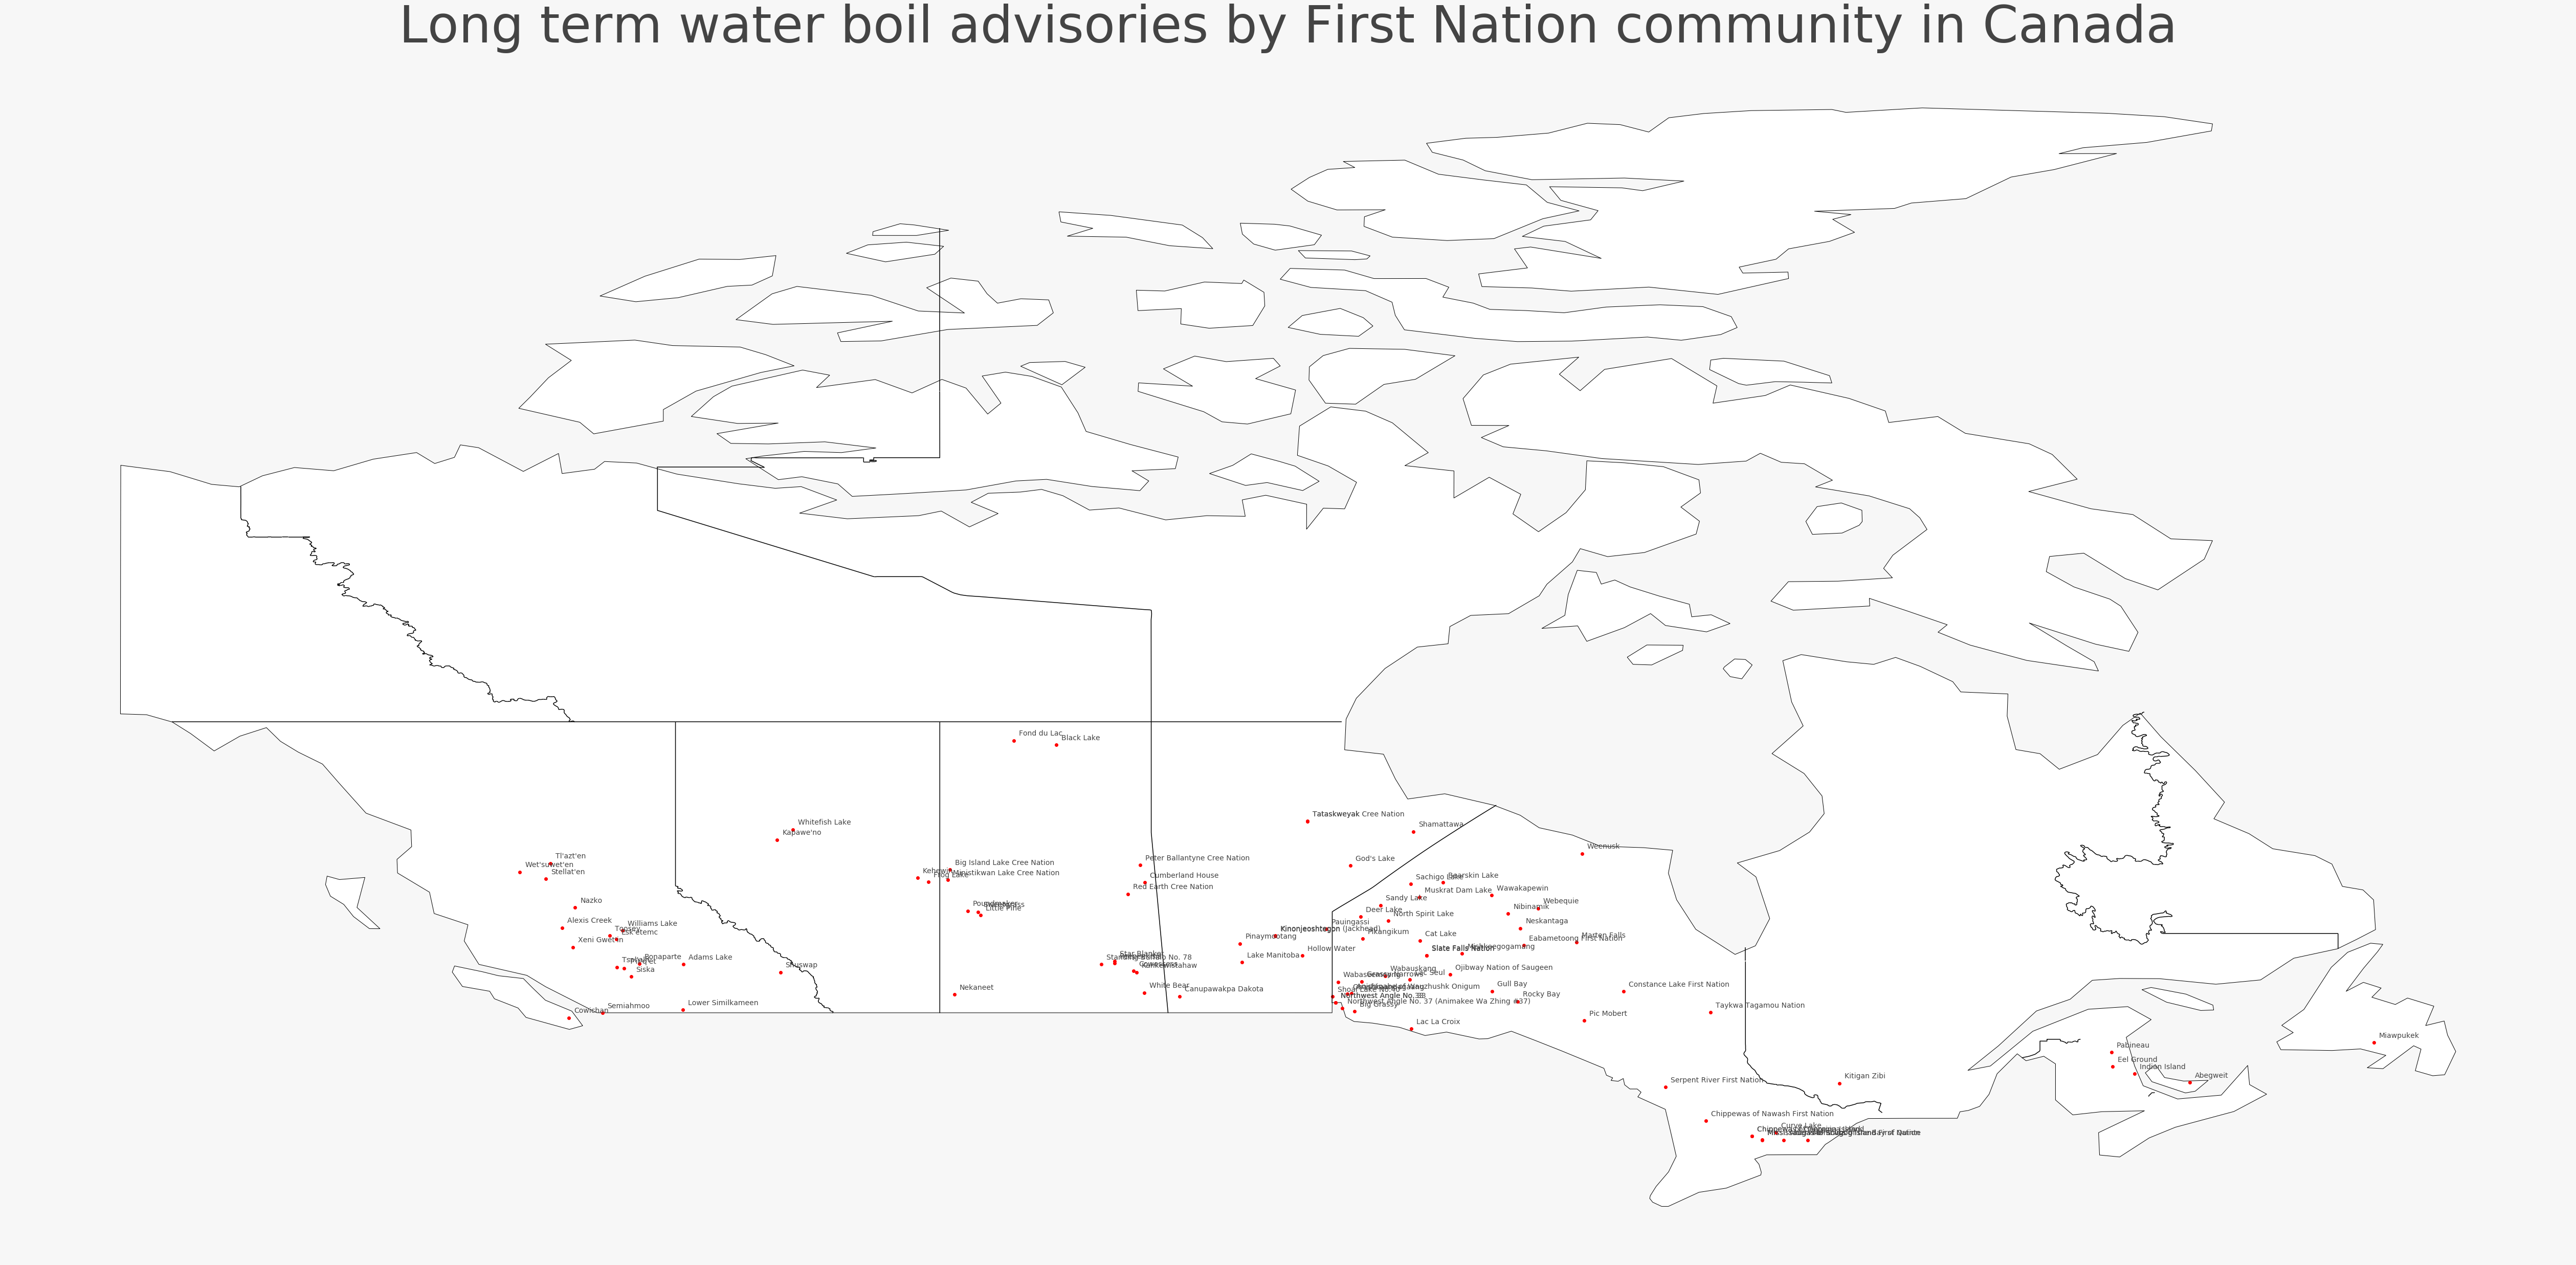

In [36]:
#creating the map

fig, gax = plt.subplots(figsize=(90,90))
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.query("name == 'Canada'").plot(ax=gax, edgecolor='black', color='white')

geo_wb_map.plot(ax=gax, color='red', alpha = 1)

world = gpd.read_file('ne_10m_admin_1_states_provinces_lines.shp')
can = world.query("adm0_name == 'Canada'")
can.plot(ax=gax, color='black')

gax.set_title('Long term water boil advisories by First Nation community in Canada', fontsize = 100)

for x, y, label in zip(geo_wb_map['Coordinates'].x, geo_wb_map['Coordinates'].y, geo_wb_map['First Nation']):
    gax.annotate(label, xy=(x,y), xytext=(10,10), textcoords='offset points')
    
plt.axis('off')
    
plt.show()

As we can see from the graph above, the provinces that are most affected by long term water boil advisories are Manitoba and Ontario. 

### Regression

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();
plotly_template = qeds.themes.plotly_template()
colors = qeds.themes.COLOR_CYCLE

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)


import panel_ols


ModuleNotFoundError: No module named 'panel_ols'

In [34]:
list(demo_df.columns) 
#X = demo_df.drop(["price", "date", "id"], axis=1).copy()

['year',
 'first_nation',
 'population',
 'total_married',
 'married_commonlaw',
 'notmarried_commonlaw',
 'total_family',
 'children',
 'not_in_family',
 'aboriginal_mother_tongue',
 'aboriginal_home_language',
 'total_mobility_1yr',
 'non-movers_1yr',
 'movers_1yr',
 'total_mobility_5yr',
 'non-movers_5yr',
 'movers_5yr',
 'total_hs_higher_edu',
 'no_hs_higheredu',
 'hs_edu',
 'higher_edu_below',
 'higher_edu_bach',
 'total_lbr',
 'in_lbr_force',
 'employed',
 'unemployed',
 'not_in_lbr_force',
 'participation_rate',
 'employment_rate',
 'unemployment_rate',
 'multiple_on',
 'advisory_on',
 'married',
 'child_perc',
 'single_perc',
 'movers_1yr_perc',
 'movers_5yr_perc',
 'high_school_more']